In [14]:
%pylab inline
import torch
import numpy
import sklearn.datasets
import torchvision.datasets

Populating the interactive namespace from numpy and matplotlib


In [23]:
# Fetching dataset
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)
# mnist = sklearn.datasets.fetch_mldata('MNIST original')

In [24]:
train_features = MNIST_train.train_data
train_labels = MNIST_train.train_labels
test_features = MNIST_test.test_data
test_labels = MNIST_test.test_labels

tensor(5)


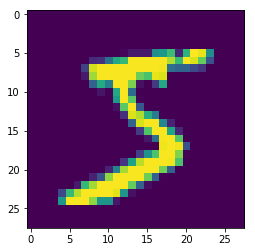

In [25]:
imshow(train_features[0, :, :].numpy())
print(train_labels[0])

tensor(0)


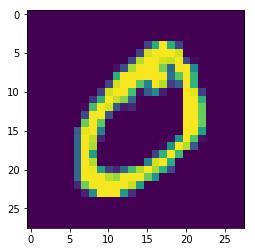

In [26]:
imshow(train_features[1, :, :].numpy())
print(train_labels[1])

In [27]:
train_features = train_features.numpy()
test_features = test_features.numpy()
train_labels = train_labels.numpy()
test_labels = test_labels.numpy()
print(train_features.shape)
train_features = train_features.reshape([-1, 1, 28, 28]).astype(float)
test_features = test_features.reshape([-1, 1, 28, 28]).astype(float)

(60000, 28, 28)


(60000, 1, 28, 28)

5


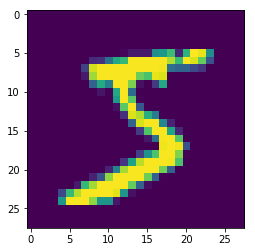

In [20]:
imshow(train_features[0,0, :, :])
print(train_labels[0])

In [9]:
# train_features = torch.FloatTensor(train_features)
# test_features = torch.FloatTensor(test_features)

In [29]:
# Всего 10 классов
class MnistConvNet(torch.nn.Module):
    def __init__(self):
        super(MnistConvNet, self).__init__()
#         self.batch_norm1 = torch.nn.BatchNorm2d(1)
        self.conv1 = torch.nn.Conv2d(1, 16, 3, padding=1)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(2, 2)
#         self.batch_norm2 = torch.nn.BatchNorm2d(16)
        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(2, 2)
#         self.batch_norm3 = torch.nn.BatchNorm2d(32)
        self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
        self.act3  = torch.nn.ReLU()
        
#         self.batch_norm4 = torch.nn.BatchNorm1d(49*64)
        self.fc1   = torch.nn.Linear(49 * 64, 256)
        self.act4  = torch.nn.Tanh()
#         self.batch_norm5 = torch.nn.BatchNorm1d(256)
        self.fc2   = torch.nn.Linear(256, 64)
        self.act5  = torch.nn.Tanh()
#         self.batch_norm6 = torch.nn.BatchNorm1d(64)
        self.fc3   = torch.nn.Linear(64, 10)
    
    def forward(self, x):
#         x = self.batch_norm1(x)
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
#         x = self.batch_norm2(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
#         x = self.batch_norm3(x)
        x = self.conv3(x)
        x = self.act3(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
#         x = self.batch_norm4(x)
        x = self.fc1(x)
        x = self.act4(x)
#         x = self.batch_norm5(x)
        x = self.fc2(x)
        x = self.act5(x)
#         x = self.batch_norm6(x)
        x = self.fc3(x)
        
        return x

In [30]:
mnist_net = MnistConvNet().cuda()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)


In [21]:
batch_size = 100
for epoch in range(100):
    order = random.permutation(train_features.shape[0])
    mnist_net.train()
    for start_index in range(0, train_features.shape[0], batch_size):
        optimizer.zero_grad()
        
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = torch.FloatTensor(train_features[batch_indice, :])
        batch_labels = torch.LongTensor(train_labels[batch_indice])
        
        features_var = torch.autograd.Variable(batch_features).cuda()
        labels_var = torch.autograd.Variable(batch_labels).cuda()
        
        preds_var = mnist_net.forward(features_var)
        loss = criterion(preds_var, labels_var)
        
        loss.backward()
        
        optimizer.step()
        
    order = random.permutation(test_features.shape[0])
    
    all_preds = []
    all_trues = []
    
    mnist_net.eval()
    for start_index in range(0, test_features.shape[0], batch_size):
        batch_indice = order[start_index:start_index+batch_size]
        batch_features = torch.FloatTensor(test_features[batch_indice, :])
        trues = test_labels[batch_indice]
        
        features_var = torch.autograd.Variable(batch_features).cuda()
        
        preds = mnist_net.forward(features_var).cpu().data.numpy().argmax(axis=1)
        
#         print preds.shape
#         print trues.shape
        
        all_preds.append(preds)
        all_trues.append(trues)
        
    all_preds = numpy.concatenate(all_preds)
    all_trues = numpy.concatenate(all_trues)
    
    print((all_preds == all_trues).astype(int).sum() / float(all_trues.size))

0.981
0.987
0.9859
0.9805
0.9845
0.9795
0.9778
0.9825
0.9862
0.9822
0.9798
0.9858
0.9794
0.9766
0.9299
0.9593
0.9743
0.9785
0.9815
0.9758
0.9705
0.9754
0.9716
0.9648
0.9759
0.9664
0.9762
0.9745
0.9313
0.9664
0.9628
0.9668
0.9657
0.9648
0.9557
0.9635
0.9587
0.9709
0.9735
0.9722
0.9664
0.9728
0.9542
0.9663
0.9451
0.9384
0.9655
0.9697
0.9631
0.9632
0.9572
0.9569
0.9309
0.9293
0.9566
0.9648
0.9677
0.9026
0.96
0.9697
0.9062
0.9633
0.9625
0.9593
0.9589
0.9513
0.9271
0.9339
0.9462
0.956
0.9484
0.951
0.9555
0.9408
0.9391
0.9139
0.9037
0.9513
0.9548
0.9562
0.9476
0.9578
0.9246
0.9481
0.9537
0.9439
0.9401
0.9483
0.7761
0.8641
0.9392
0.9542
0.9543
0.9629
0.9436
0.946
0.8888
0.9183
0.9397
0.9483


# Задание 1
Добавить (раскомментировать) строки кода, добавляющие BatchNorm в модель. Улучшается ли при этом результат? Почему?

# Задание 2
Увеличить размер пятна (perception area) каждой свертки. Улучшится ли качество?

# Задание 3 
Можно ли увеличить размер пятна каким-либо другим способом (помимо увеличения размера свертки) в промежутках между MaxPooling?